In [2]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import numpy as np
import seaborn as sns
import pandas as pd
import scienceplots

plt.style.use(['science','nature'])

读取MeSH Tree Number

In [3]:
df_mesh = pd.read_csv("../Dataset/Mesh_info.csv")
df_mesh

UI                         NAME  \
0      D000001                   Calcimycin   
1      D000002                      Temefos   
2      D000003                    Abattoirs   
3      D000004       Abbreviations as Topic   
4      D000005                      Abdomen   
...        ...                          ...   
30449  D066310               Digital Divide   
30450  D066328             Ventral Striatum   
30451  D066329           Protein Aggregates   
30452  D066330  Printing, Three-Dimensional   
30453  D066331      Laser-Evoked Potentials   

                                               TREENUBER  TREENUBER Cnt  \
0                                ['D03.633.100.221.173']              1   
1      ['D02.705.400.625.800', 'D02.705.539.345.800',...              3   
2             ['J01.576.423.200.700.100', 'J03.540.020']              2   
3                            ['L01.559.598.400.556.131']              1   
4                                        ['A01.923.047']              1   
...                                                  ...            ...   
30449                                ['L01.143.230.500']              1   
30450            ['A08.186.211.200.885.287.249.487.775']              1   
30451                                        ['D05.875']              1   
30452  ['J01.897.564', 'L01.224.108.150.500', 'L01.29...              3   
30453  ['G07.265.216.500.400.500', 'G11.561.200.500.4...              2   

       TREENUBER Common  
0                    19  
1                     4  
2                     2  
3                    23  
4                    11  
...                 ...  
30449                15  
30450                35  
30451                 7  
30452                 0  
30453                 1  

[30454 rows x 5 columns]

In [4]:
# ui --> tree number list
ui_tn_dict = {df_mesh.loc[i,"UI"]: eval(df_mesh.loc[i,"TREENUBER"]) for i in range(30454)}
# tree number --> ui
tn_ui_dict = {}
for u, v in ui_tn_dict.items():
    for j in v:
        tn_ui_dict[j] = u
# ui --> name
ui_name_dict = {df_mesh.loc[i,"UI"]: df_mesh.loc[i,"NAME"]  for i in range(30454)}

读取网络

In [5]:
G = nx.read_gml("../Base_main.gml")

定义按Level共现的网络

In [6]:
def get_level_from_tree_number(tree_number:str, level:int) -> str:
    subs = [tree_number[0]] + tree_number[1:].split('.') if '.' in tree_number else [tree_number[0], tree_number[1:]]
    if level > len(subs):
        return False
    return subs[0]+".".join(subs[1:level])

def get_level_from_ui(ui:str, level:int) -> list:
    return [get_level_from_tree_number(x, level=level) for x in ui_tn_dict[ui] if get_level_from_tree_number(x, level=level)]

def create_by_level(level:int, G:nx.Graph) -> nx.Graph:
    G_temp = nx.Graph()
    for u, v in G.edges:
        u_ui, v_ui = G.nodes[u]['ui'], G.nodes[v]['ui']
        u_level, v_level = get_level_from_ui(u_ui, level=level), get_level_from_ui(v_ui, level=level)
        weight = G[u][v]['weight']
        # multi count
        for ul in u_level:
            for vl in v_level:
                if G_temp.has_edge(ul, vl):
                    G_temp[ul][vl]['weight'] += weight
                else:
                    G_temp.add_edge(ul, vl, weight=weight)
    return G_temp

In [7]:
level1_name = {"A": "Anatomy", "B": "Organisms", "C": "Diseases", "D": "Chemicals and Drugs",
"E": "Analytical, Diagnostic and Therapeutic Techniques, and Equipment",
"F": "Psychiatry and Psychology",
"G": "Phenomena and Processes",
"H": "Disciplines and Occupations", 
"I": "Anthropology, Education, Sociology, and Social Phenomena", 
"J": "Technology, Industry, and Agriculture", 
"K": "Humanities", 
"L": "Information Science", 
"M": "Named Groups", 
"N": "Health Care", 
"V": "Publication Characteristics", 
"Z": "Geographicals"}

In [8]:
# for i in range(1, 6):
i = 1
G_temp = create_by_level(i, G)
print(f"level={i}, {G_temp.number_of_nodes()}")
nx.write_gml(G_temp, f"../gml_task/Base_Level{i}.gml")

level=1, 15


In [46]:
G_commented = nx.read_gml("../Commented_main.gml")
for i in range(1, 6):
    G_temp = create_by_level(i, G_commented)
    print(f"level={i}, {G_temp.number_of_nodes()}")
    nx.write_gml(G_temp, f"Commented_Level{i}.gml")

level=1, 15
level=2, 111
level=3, 1697
level=4, 6288
level=5, 9894


邻接矩阵

In [11]:
# Base
# for i in range(1,6):
i = 1
G_temp = nx.read_gml(f"../gml_task/Base_Level{i}.gml")
for n in G_temp.nodes:  # n : tree number
    if len(n) > 1:
        G_temp.nodes[n]['ui'] = tn_ui_dict[n]
        G_temp.nodes[n]['name'] = ui_name_dict[G_temp.nodes[n]['ui']]
    else:
        G_temp.nodes[n]['name'] = level1_name[n]
nx.write_gml(G_temp, f"../gml_task/Base_Level{i}.gml")
    
# Commented
# for i in range(1,6):
#     G_temp = nx.read_gml(f"./Commented_Level{i}.gml")
#     for n in G_temp.nodes:  # n : tree number
#         if len(n) > 1:
#             G_temp.nodes[n]['ui'] = tn_ui_dict[n]
#             G_temp.nodes[n]['name'] = ui_name_dict[G_temp.nodes[n]['ui']]
#         else:
#             G_temp.nodes[n]['name'] = level1_name[n]
#     nx.write_gml(G_temp, f"./Commented_Level{i}.gml")

Level 1

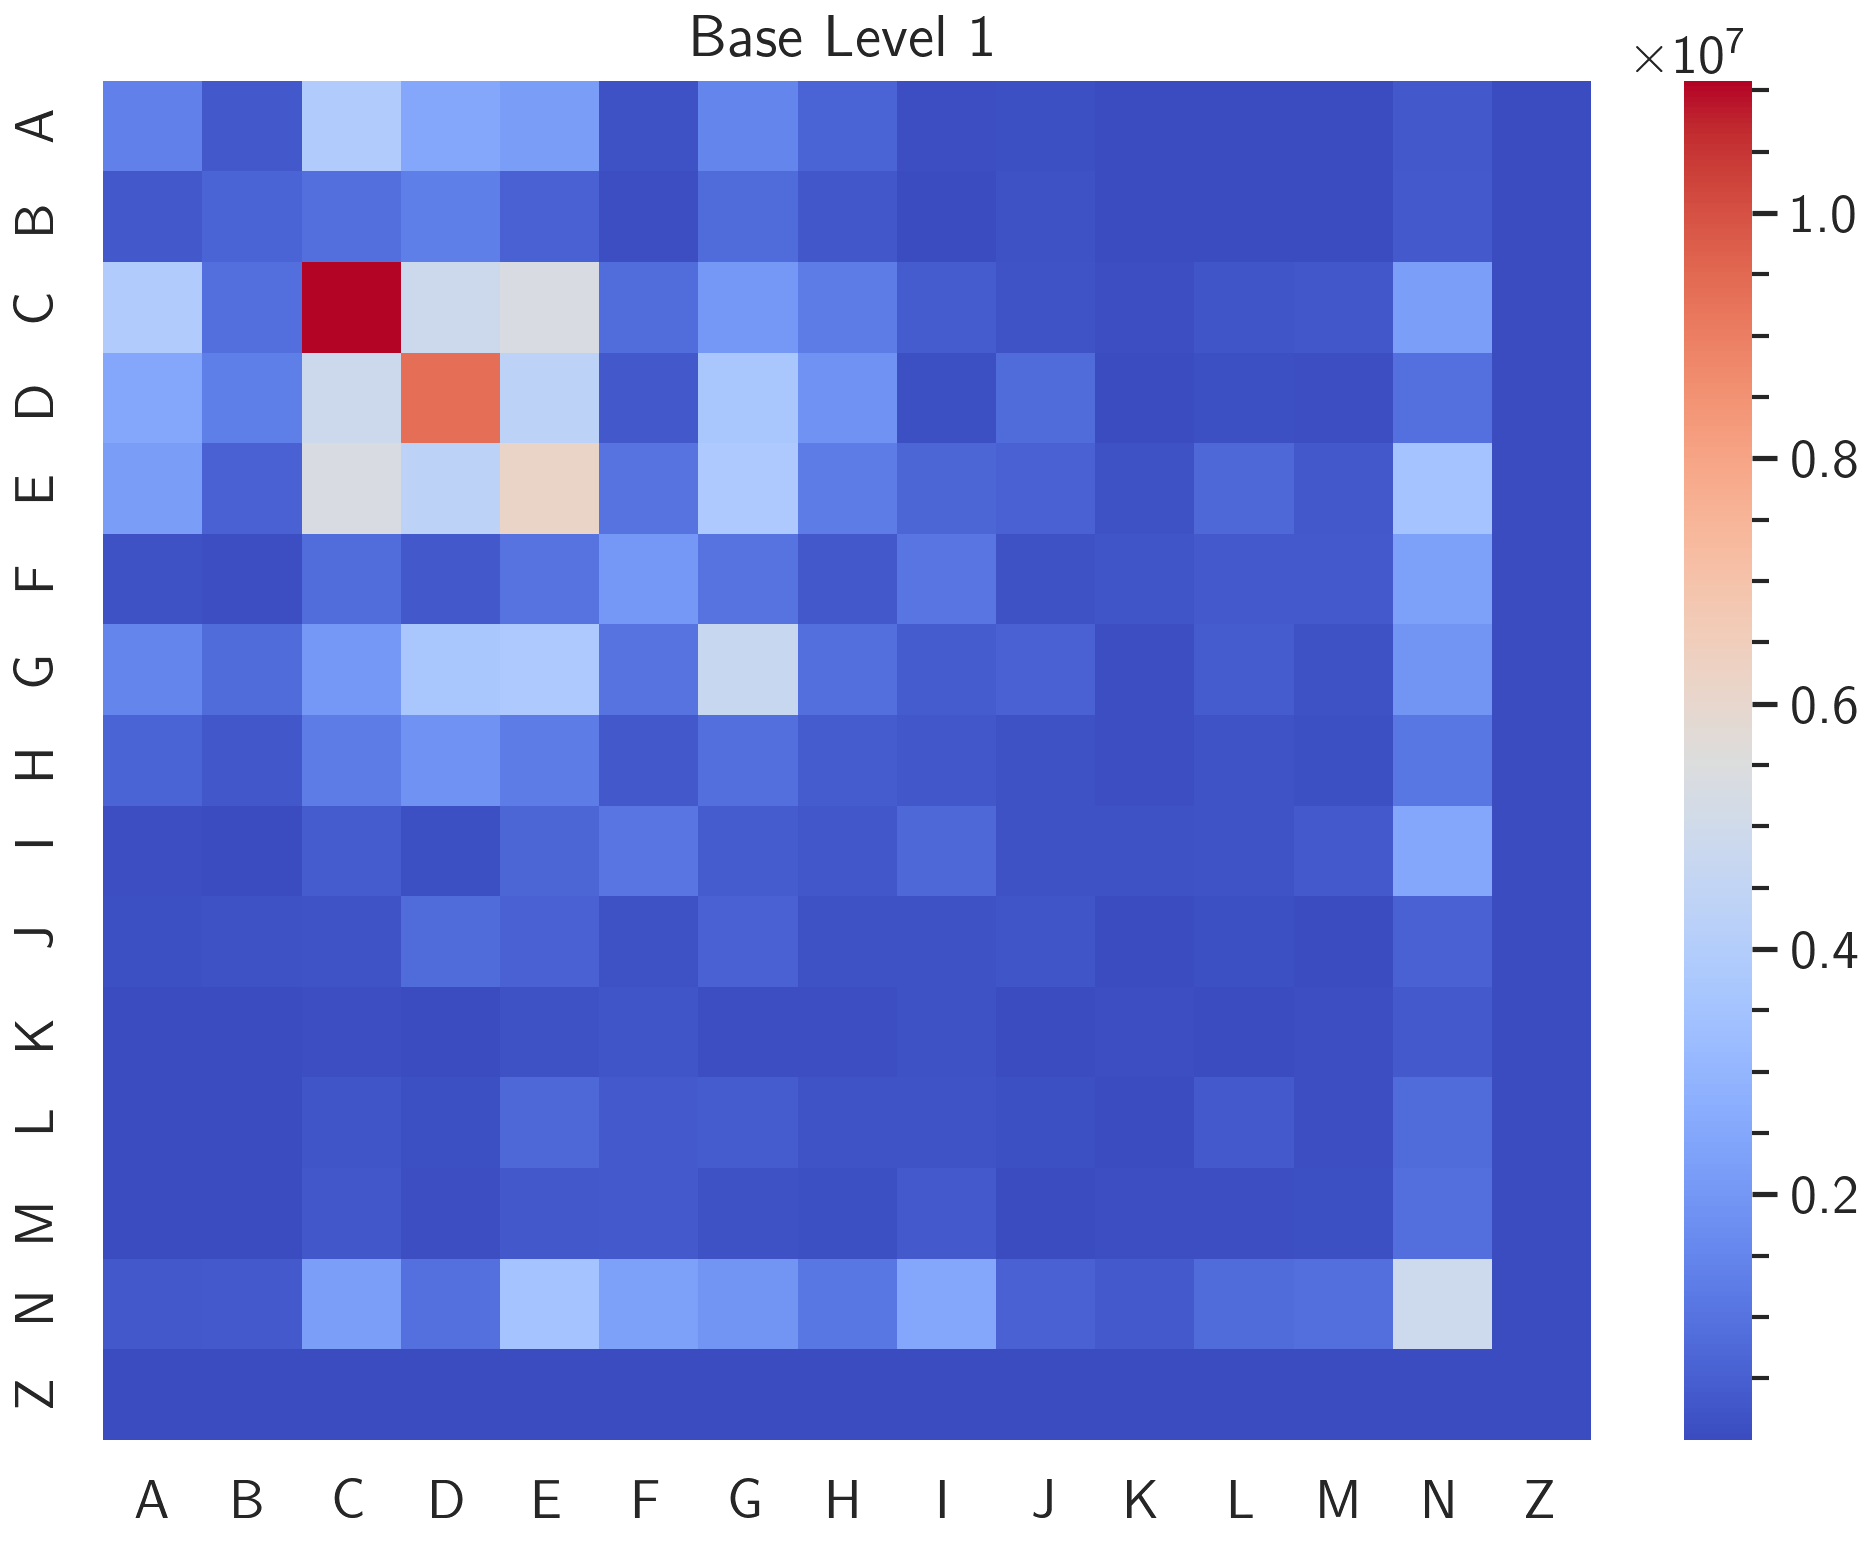

In [14]:
i = 1
# for type in ["Base", "Commented"]:
type = "Base"
G_now = nx.read_gml(f"../gml_task/Base_Level{i}.gml")
# 对节点进行排序
sorted_nodes = sorted(G_now.nodes)
# 获取邻接矩阵
adj_matrix = nx.convert_matrix.to_numpy_array(G_now, nodelist=sorted_nodes)
df_adj_matrix = pd.DataFrame(adj_matrix, index=sorted_nodes, columns=sorted_nodes)
df_adj_matrix.to_csv(f"../csv_file/{type}_adj_matrix_Level{i}.csv")
# 绘制热力图
plt.figure(figsize=(8, 6), dpi=300)
sns.set(font_scale=1.2)
sns.heatmap(adj_matrix, annot=False, cmap='coolwarm', xticklabels=sorted_nodes, yticklabels=sorted_nodes)
# 获取当前的坐标轴对象
plt.title(f"{type} Level {i}")
plt.show()
        

Level 2

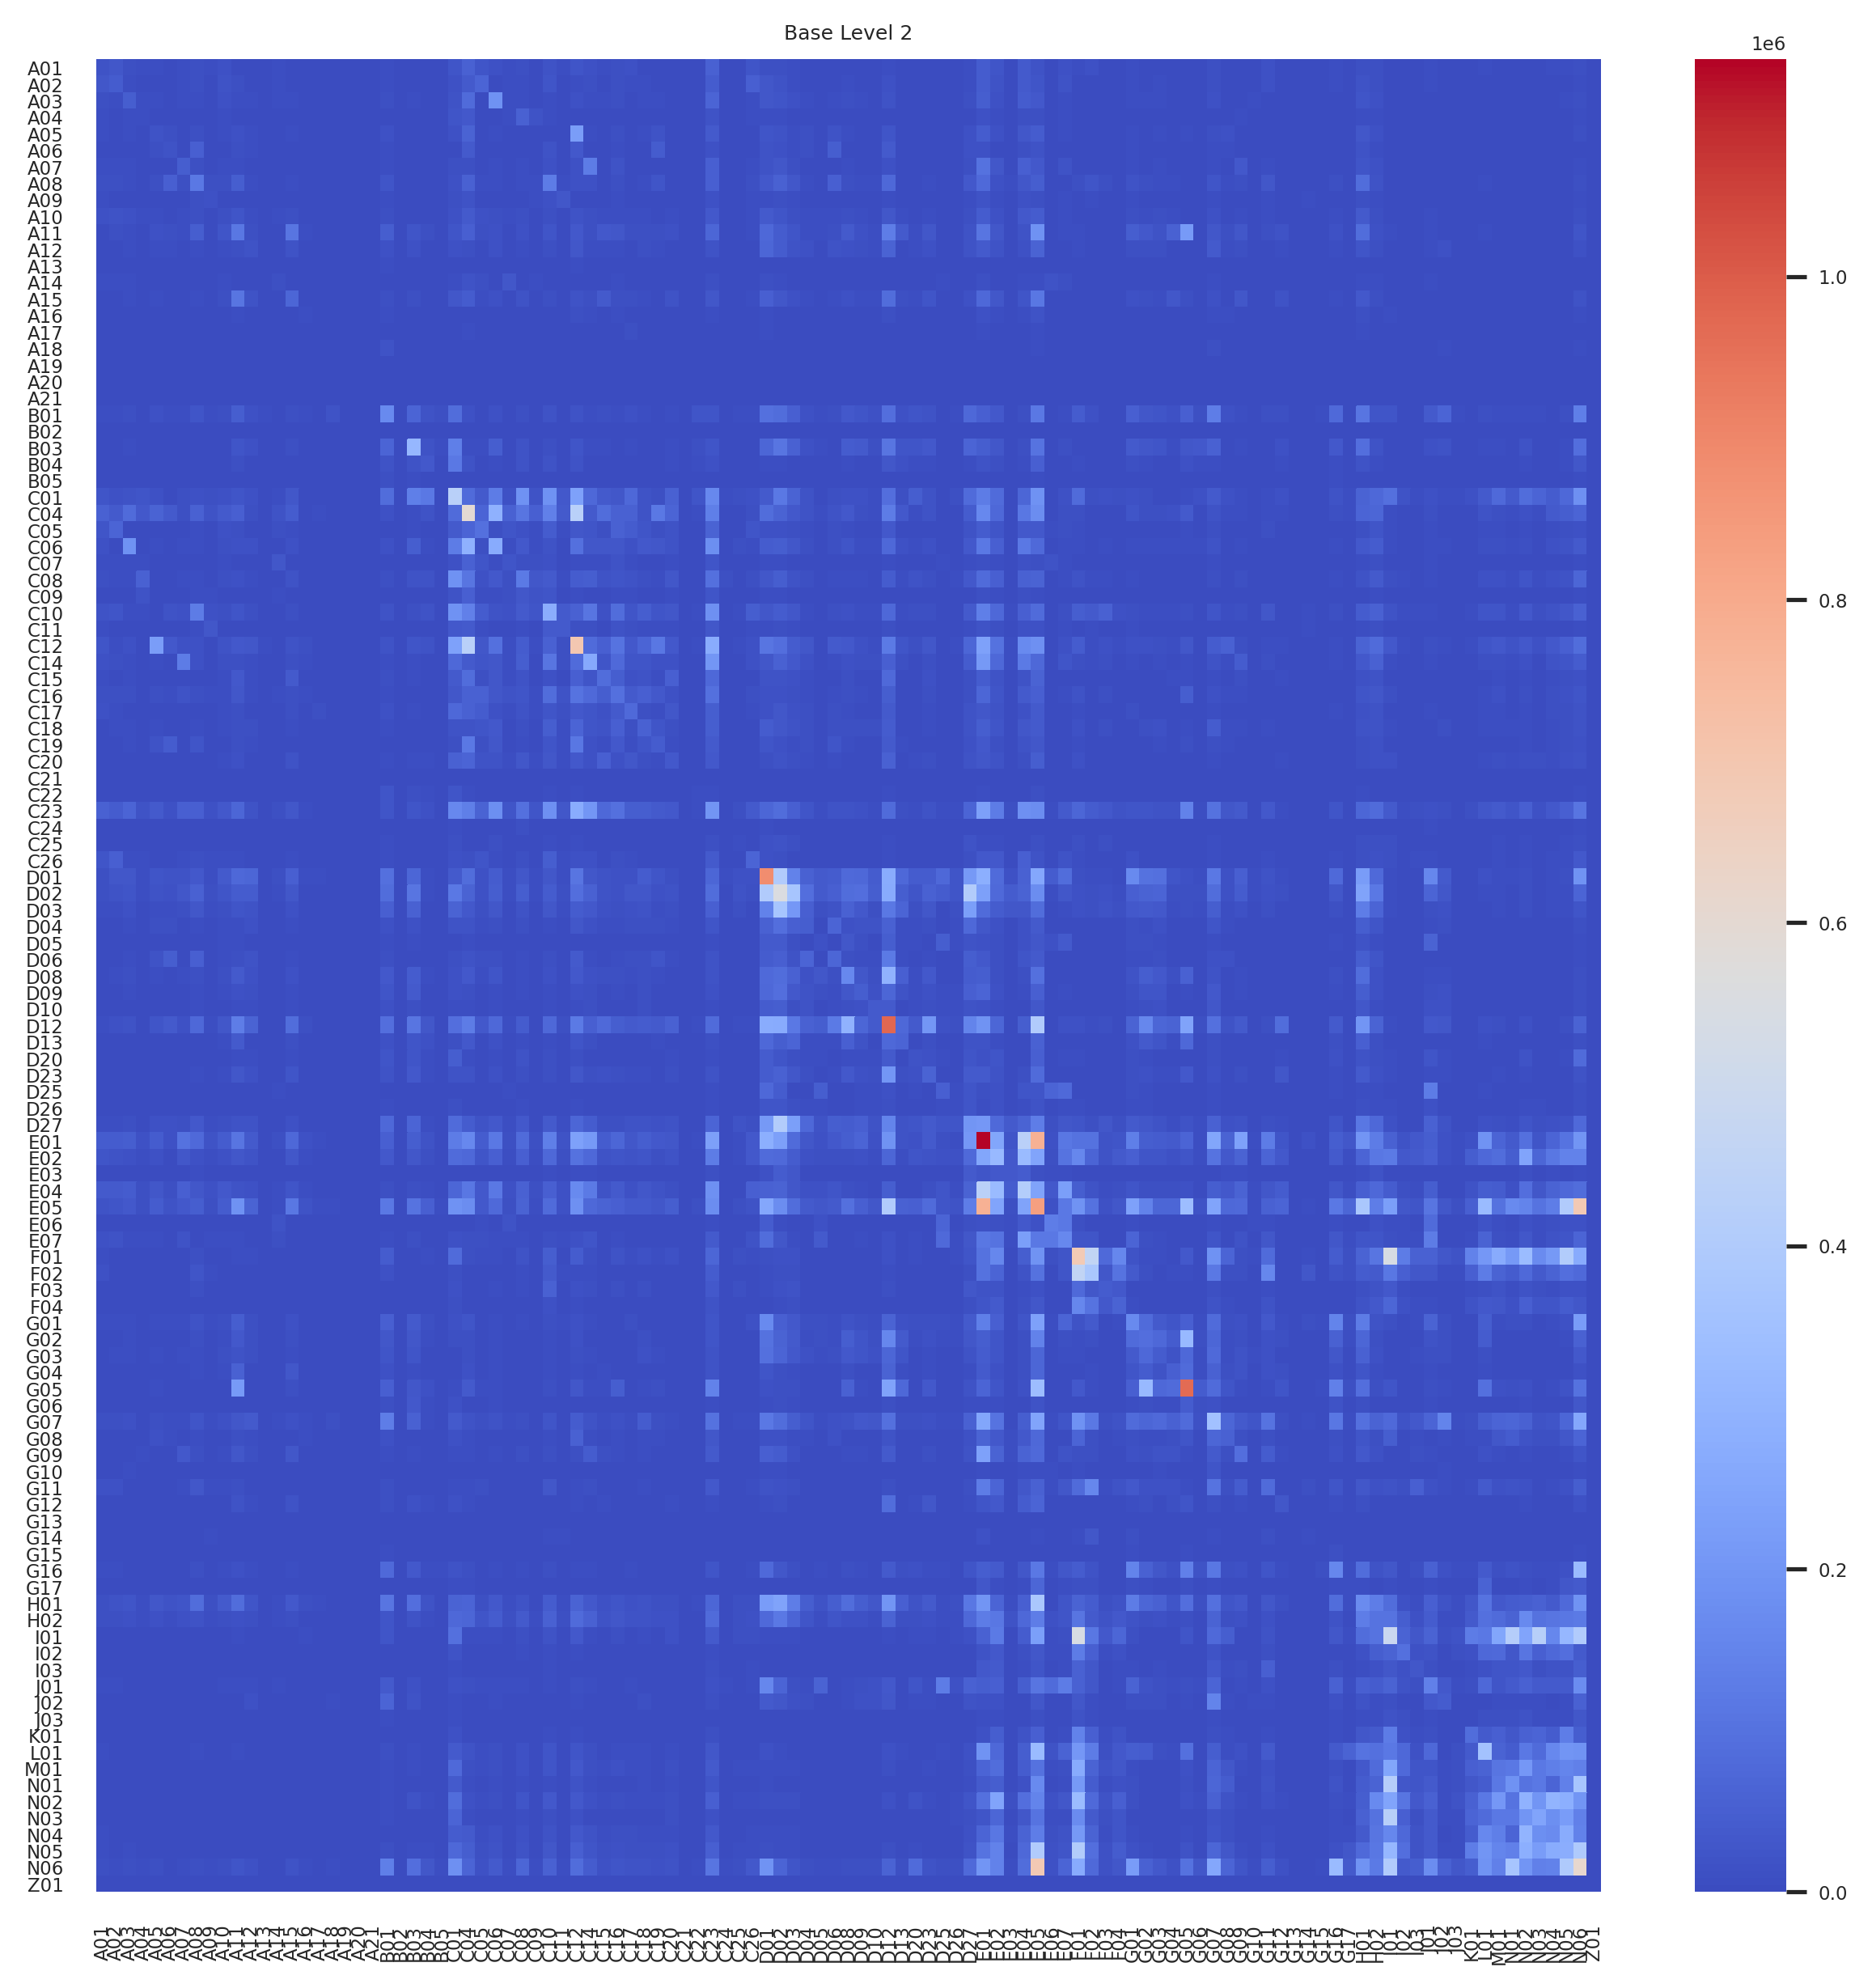

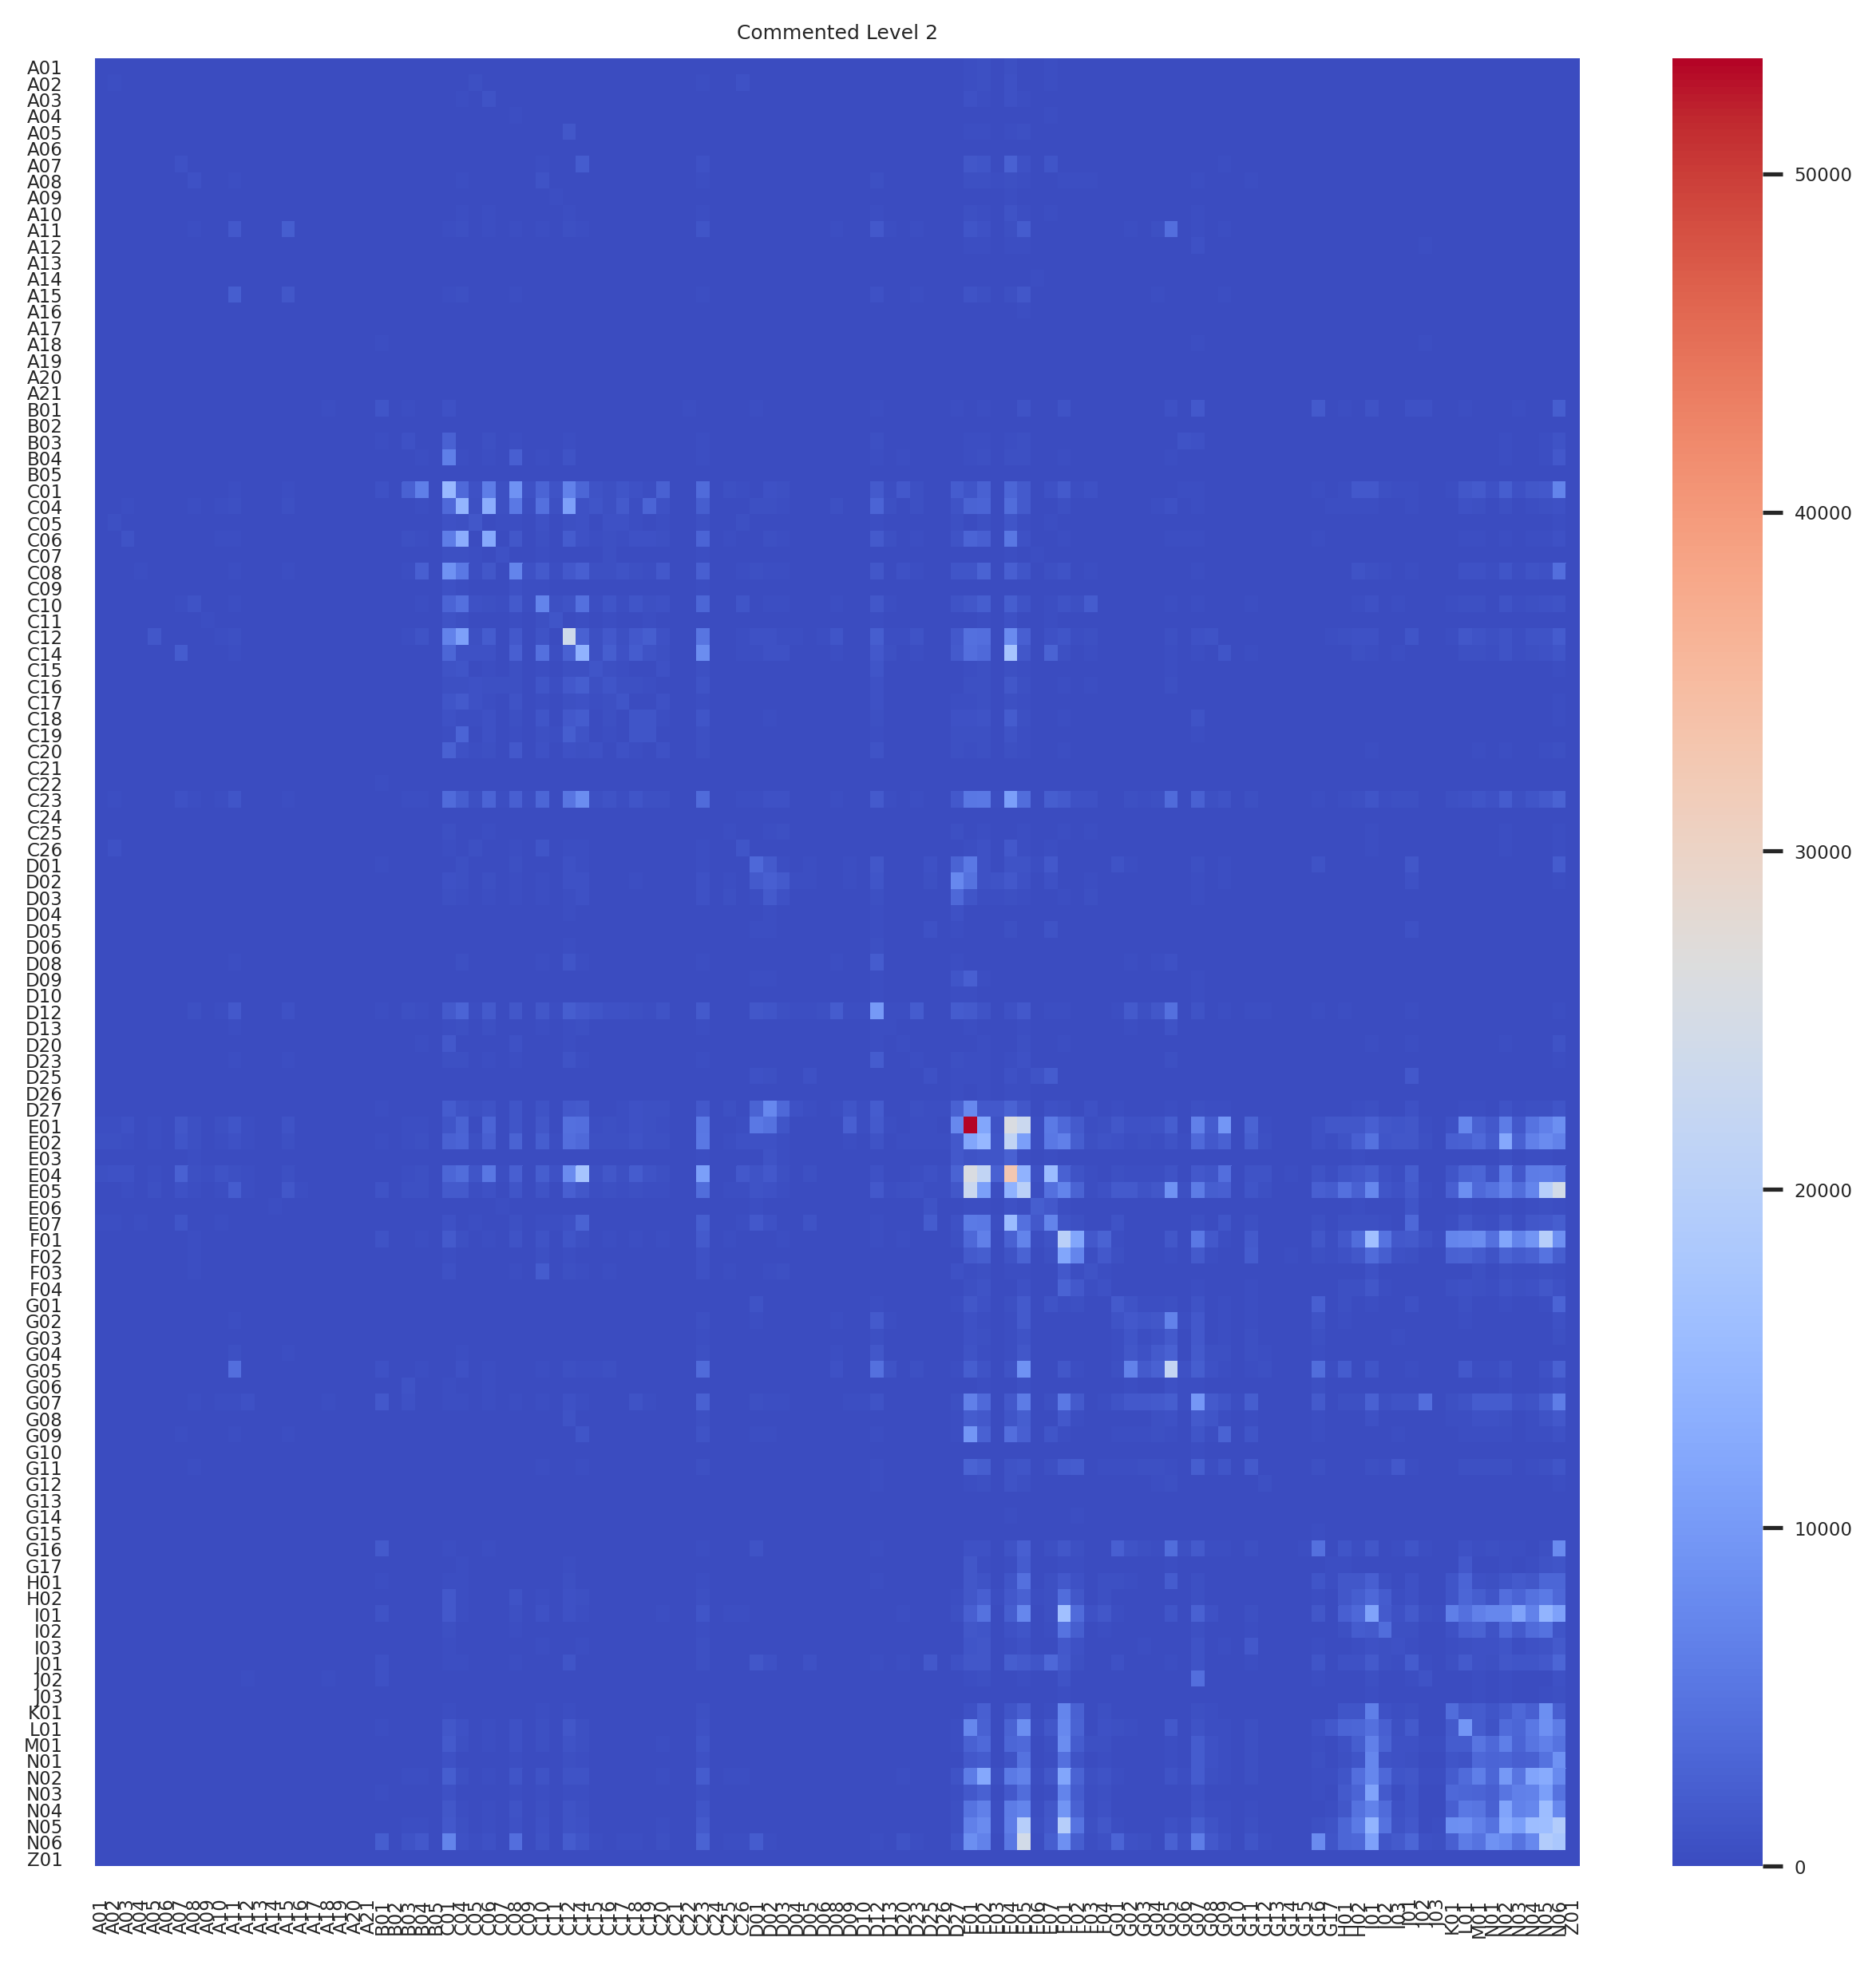

In [77]:
i = 2
for type in ["Base", "Commented"]:
    G_now = nx.read_gml(f"./{type}_Level{i}.gml")
    # 对节点进行排序
    sorted_nodes = sorted(G_now.nodes)
    # 获取邻接矩阵
    adj_matrix = nx.convert_matrix.to_numpy_array(G_now, nodelist=sorted_nodes)
    df_adj_matrix = pd.DataFrame(adj_matrix, index=sorted_nodes, columns=sorted_nodes)
    df_adj_matrix.to_csv(f"../csv_file/{type}_Level{i}.csv")
    # 绘制热力图
    plt.figure(figsize=(10, 10), dpi=300)
    sns.set(font_scale=0.5)
    sns.heatmap(adj_matrix, annot=False, cmap='coolwarm', xticklabels=sorted_nodes, yticklabels=sorted_nodes)

    plt.title(f"{type} Level {i}")
    plt.show()
        

Level 3-5

In [78]:
for i in range(3, 6):
    for type in ["Base", "Commented"]:
        G_now = nx.read_gml(f"./{type}_Level{i}.gml")
        # 对节点进行排序
        sorted_nodes = sorted(G_now.nodes)
        # 获取邻接矩阵
        adj_matrix = nx.convert_matrix.to_numpy_array(G_now, nodelist=sorted_nodes)
        df_adj_matrix = pd.DataFrame(adj_matrix, index=sorted_nodes, columns=sorted_nodes)
        df_adj_matrix.to_csv(f"../csv_file/{type}_Level{i}.csv")

结论：全局差异较小；采取修剪法；仅查看Level1和Level2

In [12]:
# 便于查看的映射

tn_name_dict = {tn: ui_name_dict[ui] for tn, ui in tn_ui_dict.items()}
import csv
with open("../csv_file/tn_name_match.csv", mode='w', newline='') as file:
    writer = csv.writer(file)
    # 写入CSV文件的标题行
    writer.writerow(['TN', 'NAME'])
    # 遍历字典的键值对并写入CSV文件
    for tn, name in tn_name_dict.items():
        writer.writerow([tn, name])

基于计数法的探查

- 分别计算Base和Commented的加权度
- 遍历50,75,90,95,99分位数的节点
- 对每一个节点找到其Level 1, 2, 3, 4, 5的Tree Number
- 统计各个Level TN的值
- 形成表格

In [84]:
weighted_degrees = dict(G.degree(weight='weight'))
weighted_degrees_commented = dict(G_commented.degree(weight='weight'))


In [90]:
wd_list = list(weighted_degrees.values())
wd_list_commented = list(weighted_degrees_commented.values())

In [120]:
def level_count_G(level:int, type:str, G):
    leveled_tn_cnt = {}
    for percentile in [5, 25, 50, 75, 95, 99]:
        leveled_tn_cnt[percentile] = dict()
        if type == "Base":
            # Step 1: Calculate the percentile threshold
            threshold = np.percentile(wd_list, percentile)
            # Step 2: Filter nodes with a weight greater than or equal to the specified percentile
            filtered_nodes = [node for node, degree in weighted_degrees.items() if degree >= threshold]
            # Step 3: Create a dictionary to store the counts of tree numbers at the specified level
        elif type == "Commented":
            threshold = np.percentile(wd_list_commented, percentile)
            filtered_nodes = [node for node, degree in weighted_degrees_commented.items() if degree >= threshold]
        # print(f"threshold: {threshold}, nodes: {len(filtered_nodes)}")
        for node in filtered_nodes:
            ui = G.nodes[node]['ui']
            tree_numbers = get_level_from_ui(ui, level)
            for tn in tree_numbers:
                if tn not in leveled_tn_cnt[percentile]:
                    leveled_tn_cnt[percentile][tn] = 1
                else:
                    leveled_tn_cnt[percentile][tn] += 1
    # Step 4: Create a DataFrame from the counts dictionary
    counts_df = pd.DataFrame(leveled_tn_cnt).T
    # sort columns
    sorted_columns = sorted(counts_df.columns)
    counts_df = counts_df[sorted_columns]
    return counts_df

In [121]:
level_count_G(1, type="Base", G=G)

threshold: 0.0, nodes: 30454
threshold: 36.0, nodes: 22884
threshold: 242.0, nodes: 15249
threshold: 1408.0, nodes: 7615
threshold: 10047.499999999985, nodes: 1523
threshold: 29146.44000000006, nodes: 305


A       B        C        D       E       F       G      H      I  \
5   3319.0  5227.0  12950.0  23745.0  5430.0  1456.0  3838.0  592.0  870.0   
25  2763.0  3260.0  11223.0  13823.0  5032.0  1333.0  3415.0  556.0  764.0   
50  1885.0  1417.0   7507.0   7122.0  4019.0  1091.0  2653.0  467.0  634.0   
75   899.0   442.0   3336.0   2861.0  2166.0   663.0  1509.0  290.0  409.0   
95   169.0    61.0    430.0    417.0   471.0   201.0   350.0   95.0  110.0   
99    34.0     6.0     64.0     50.0    90.0    47.0    87.0   25.0   33.0   

        J      K      L      M       N      V      Z  
5   770.0  218.0  559.0  407.0  2922.0  231.0  522.0  
25  691.0  200.0  506.0  341.0  2681.0    NaN    3.0  
50  549.0  166.0  407.0  269.0  2198.0    NaN    3.0  
75  320.0  104.0  247.0  169.0  1402.0    NaN    2.0  
95   44.0   21.0   56.0   45.0   379.0    NaN    NaN  
99    4.0    2.0   12.0    7.0    94.0    NaN    NaN

In [116]:
for l in range(1, 6):
    for type in ["Base", "Commented"]:
        if type == "Base":
            df_temp = level_count_G(l, type="Base", G=G)
        else:
            df_temp = level_count_G(l, type="Commented", G=G_commented)
        df_temp.to_csv(f"../csv_file/{type}_G_count_level{l}.csv")
        print(f"{type}_G_count_level{l}.csv")

Base_count_level1.csv
Commented_count_level1.csv
Base_count_level2.csv
Commented_count_level2.csv
Base_count_level3.csv
Commented_count_level3.csv
Base_count_level4.csv
Commented_count_level4.csv
Base_count_level5.csv
Commented_count_level5.csv


可视化

In [5]:

def draw_table(level, type):
    df =  pd.read_csv(f"../csv_file/{type}_count_level{level}.csv", index_col=0)
    df.fillna(0, inplace=True)
    title = type + " level " + str(level)
    
    data = df.to_numpy().astype(int)
    normalized_data = data.copy()
    for idx, row in enumerate(data):
        # normalized_row = ((row - row.min()) / (row.max() - row.min())) * 100
        s = sum(row)
        normalized_row = row / s * 100
        normalized_data[idx] = normalized_row
    # 基准颜色
    base_color = "#006cff"
    # 创建一个图表对象
    fig, ax = plt.subplots(figsize=(len(df.columns), 4))
    fig.set_dpi(300)
    # 创建表格
    table = ax.table(cellText=normalized_data, loc='center', cellLoc='center', rowLabels=df.index, colLabels=df.columns)
    # 设置表格样式
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1, 1.5)
    # 设置单元格的颜色和alpha值
    for i in range(len(data)):
        for j in range(len(data[i])):
            cell_value = normalized_data[i, j]
            alpha_value = cell_value / 100  # 将归一化值映射到0-1的alpha值
            cell_color = base_color + hex(int(alpha_value * 255))[2:].zfill(2)  # 使用16进制表示的颜色和alpha值
            table.get_celld()[(i+1, j)].set_facecolor(cell_color)
    # 隐藏坐标轴
    ax.axis('off')
    plt.title(title, fontsize=len(df.columns))
    plt.show()

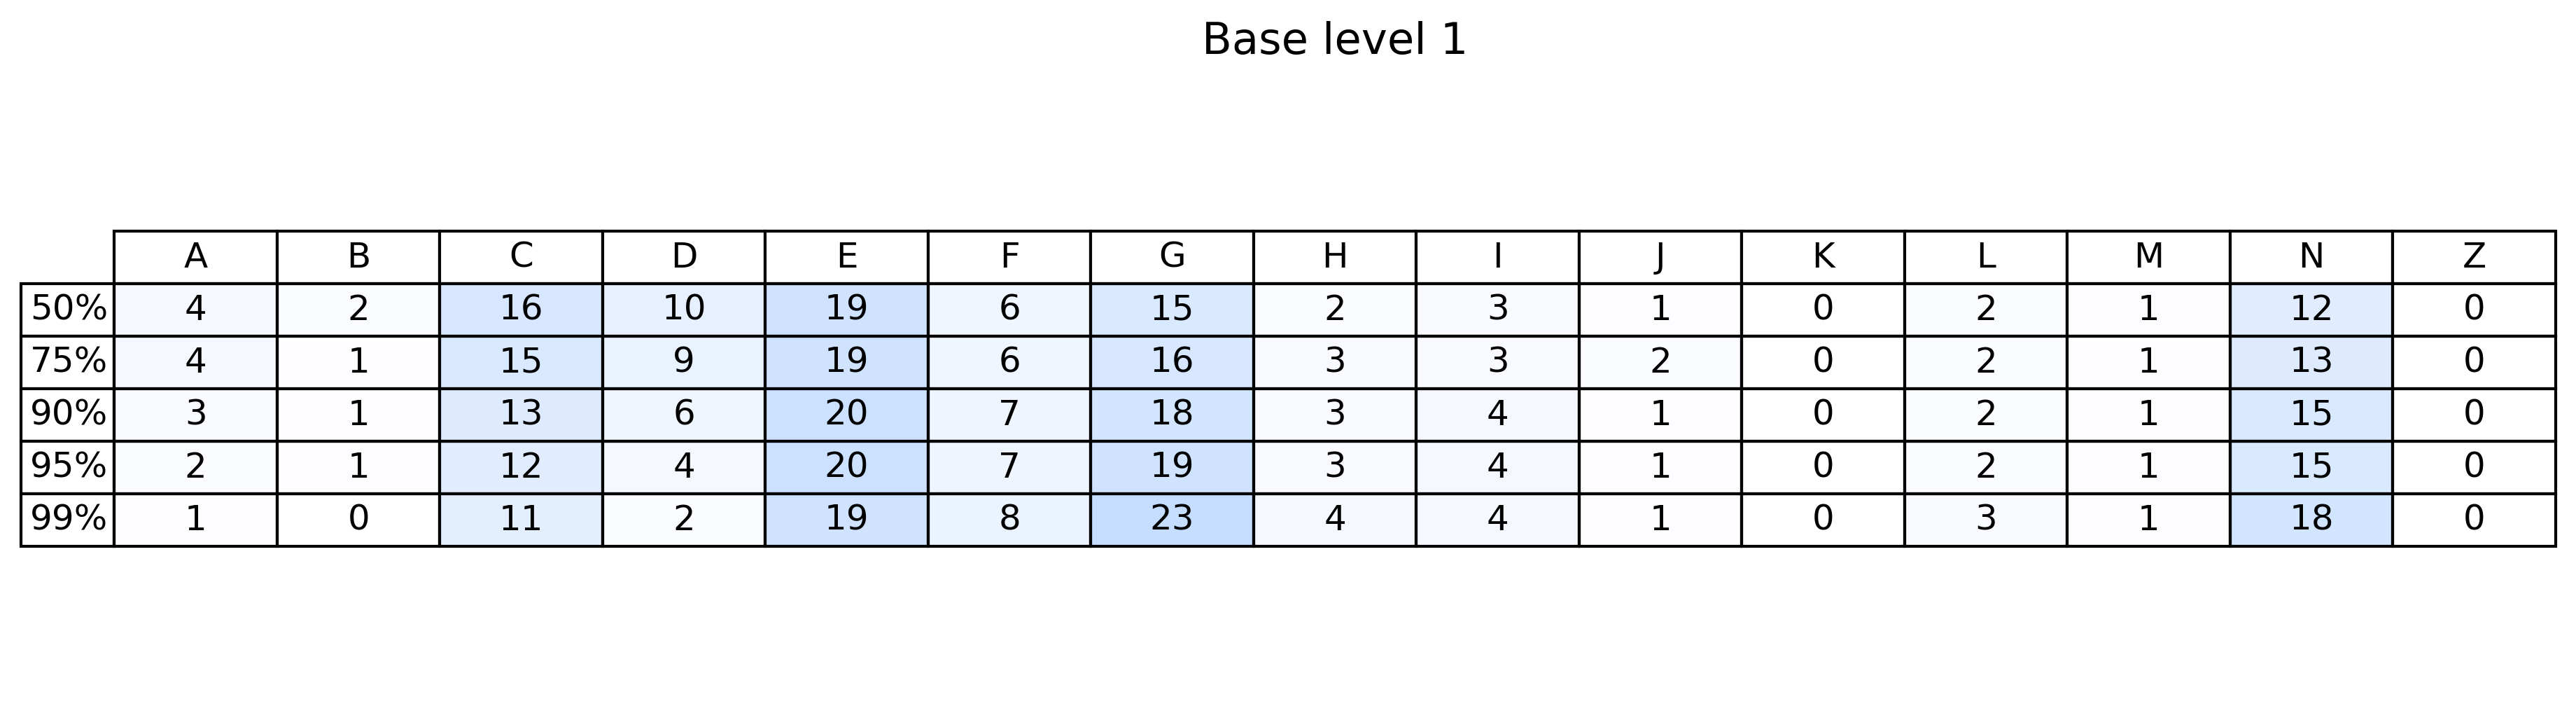

In [59]:
draw_table(1, "Base")

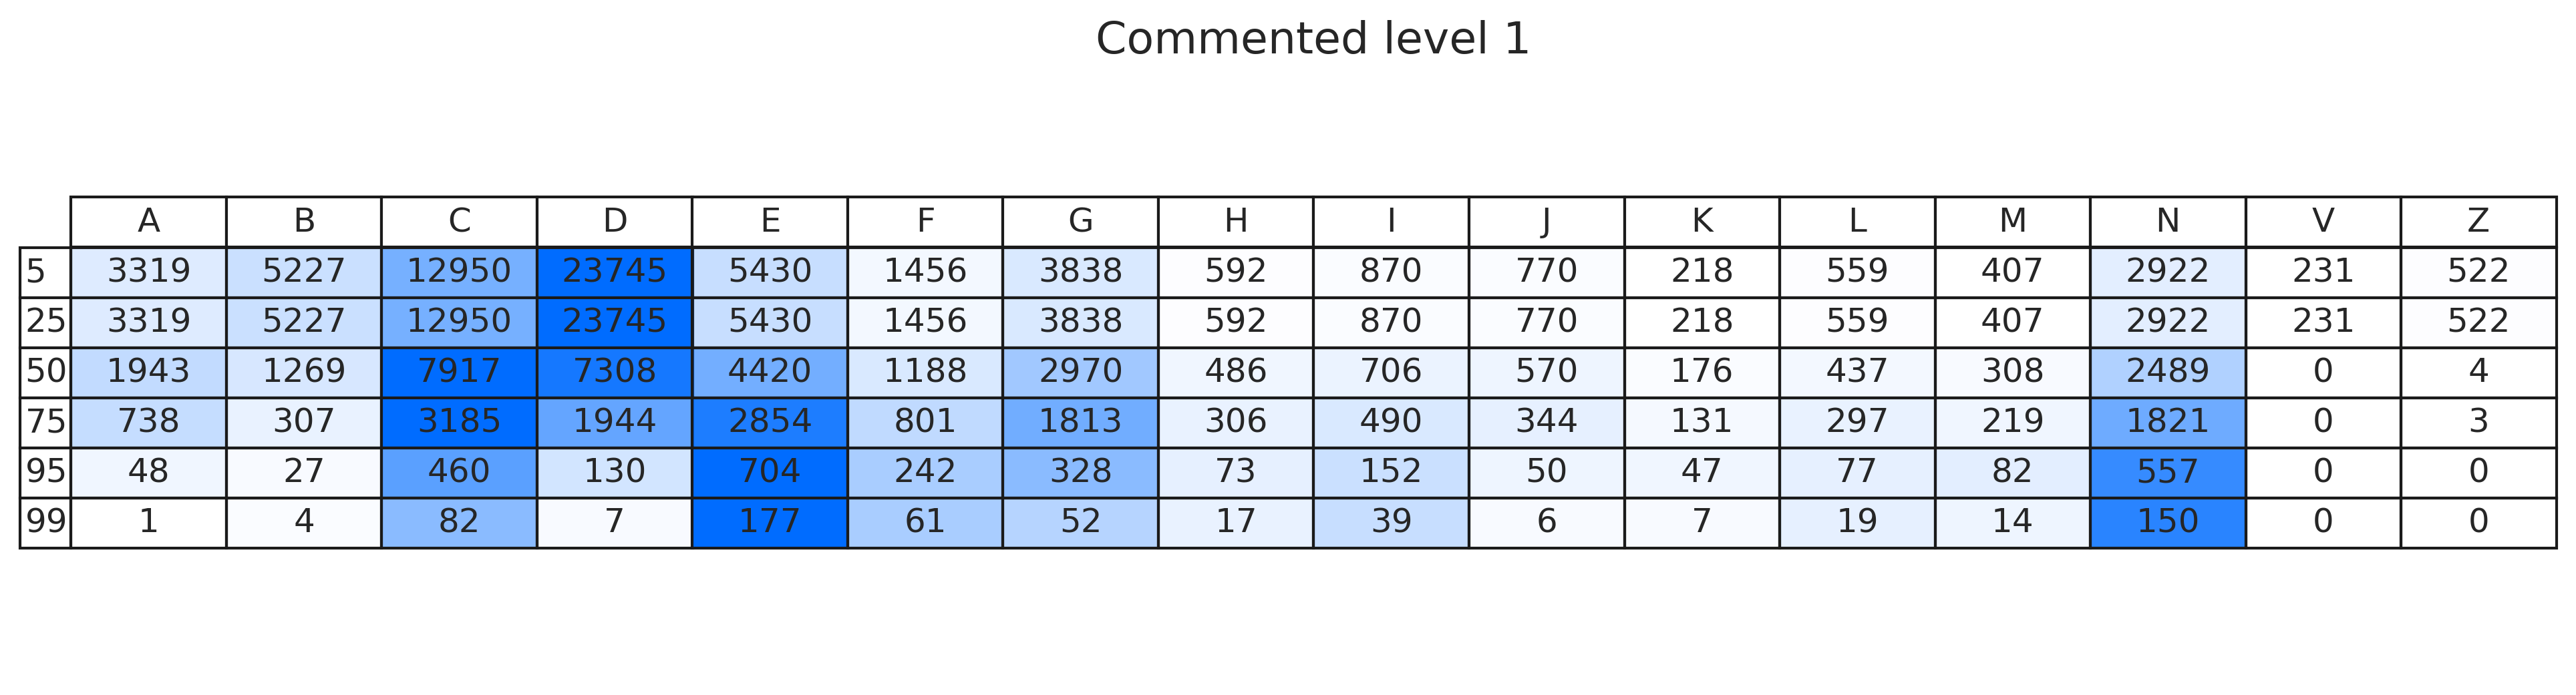

In [156]:
draw_table(1, "Commented")

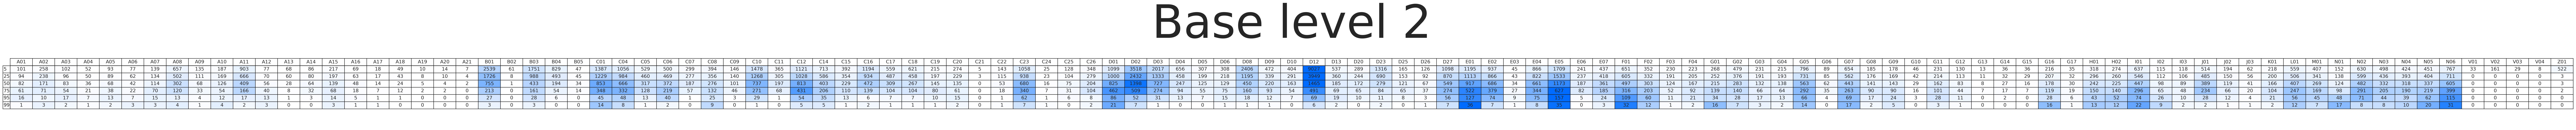

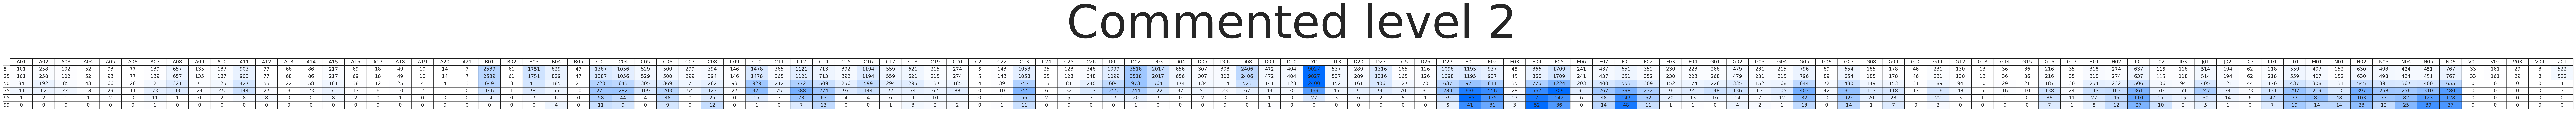

In [157]:
draw_table(2, "Base")
draw_table(2, "Commented")

读取文档

In [6]:
df = pd.read_csv("../Dataset/Re.csv")
df

PMID            DescriptorName DescriptorName_MajorTopicYN  \
0                 1  Aldehyde Oxidoreductases                           N   
1                 1                   Animals                           N   
2                 1               Body Fluids                           N   
3                 1            Carbon Dioxide                           N   
4                 1                  Formates                           N   
...             ...                       ...                         ...   
314390848  36472375             United States                           N   
314390849  36472375         Awards and Prizes                           Y   
314390850  36472379                    Humans                           N   
314390851  36472379   End Stage Liver Disease                           Y   
314390852  36472379     Liver Transplantation                           Y   

          DescriptorName_Type DescriptorName_UI  \
0                         NaN           D000445   
1                         NaN           D000818   
2                         NaN           D001826   
3                         NaN           D002245   
4                         NaN           D005561   
...                       ...               ...   
314390848          Geographic           D014481   
314390849                 NaN           D001363   
314390850                 NaN           D006801   
314390851                 NaN           D058625   
314390852                 NaN           D016031   

                                 QualifierName  
0                         N:Q000378:metabolism  
1                                          NaN  
2                           Y:Q000032:analysis  
3                              N:Q000097:blood  
4          N:Q000097:blood;Y:Q000506:poisoning  
...                                        ...  
314390848                                  NaN  
314390849                                  NaN  
314390850                                  NaN  
314390851                                  NaN  
314390852                                  NaN  

[314390853 rows x 6 columns]

In [7]:
df_pmid_commented = pd.read_csv("../Dataset/2_PubMed_comted_pmid_220916.csv")
commented_pmid_set = set(df_pmid_commented['PMID_art'].unique())
df_commented = df.loc[df['PMID'].isin(commented_pmid_set)]
df_commented

PMID                        DescriptorName  \
1248             95                            Fibrinogen   
1249             95            Hydrogen-Ion Concentration   
1250             95                Molecular Conformation   
1251             95            Spectrometry, Fluorescence   
1252             95                           Temperature   
...             ...                                   ...   
313343848  36112522            Magnetic Resonance Imaging   
313343849  36112522                             Artifacts   
313343850  36112522                        Contrast Media   
313343851  36112522  Diffusion Magnetic Resonance Imaging   
313343852  36112522                                 Liver   

          DescriptorName_MajorTopicYN DescriptorName_Type DescriptorName_UI  \
1248                                Y                 NaN           D005340   
1249                                N                 NaN           D006863   
1250                                N                 NaN           D008968   
1251                                N                 NaN           D013050   
1252                                N                 NaN           D013696   
...                               ...                 ...               ...   
313343848                           Y                 NaN           D008279   
313343849                           Y                 NaN           D016477   
313343850                           N                 NaN           D003287   
313343851                           N                 NaN           D038524   
313343852                           N                 NaN           D008099   

                 QualifierName  
1248                       NaN  
1249                       NaN  
1250                       NaN  
1251                       NaN  
1252                       NaN  
...                        ...  
313343848    N:Q000379:methods  
313343849                  NaN  
313343850                  NaN  
313343851                  NaN  
313343852  N:Q000473:pathology  

[10005888 rows x 6 columns]

In [8]:
df_major = df[df['DescriptorName_MajorTopicYN']=='Y']
df_commented_major = df_commented[df_commented['DescriptorName_MajorTopicYN']=='Y']

统计Base和Commented中各自Major DescriptorName_UI的词频

In [9]:
from collections import Counter

word_freq = Counter(df_major['DescriptorName_UI'].tolist())
word_freq_sorted = sorted(word_freq.items(), key=lambda x:x[1])  # 排列取分位数
word_values = [x[1] for x in word_freq_sorted]  # 相同索引
word_keys = [x[0] for x in word_freq_sorted]

In [10]:
word_freq_commented = Counter(df_commented_major['DescriptorName_UI'].tolist())
word_freq_sorted_commented = sorted(word_freq_commented.items(), key=lambda x:x[1])  # 排列取分位数
word_values_commented = [x[1] for x in word_freq_sorted_commented]  # 相同索引
word_keys_commented = [x[0] for x in word_freq_sorted_commented]

In [17]:
def level_count(level:int, type:str):
    if type == "Base":
        freq = word_freq
        word_freq_sorted_values = word_values
        word_freq_sorted_keys = word_keys
    else:
        freq = word_freq_commented
        word_freq_sorted_values = word_values_commented
        word_freq_sorted_keys = word_keys_commented
        
    percentiles = list(range(0,100))
    percentile_values = dict()
    for percentile in percentiles:
        percentile_values[f"{percentile}%"] = dict()
        percentile_value = np.percentile(word_freq_sorted_values, percentile)  # 得到分位数值
        idx = np.searchsorted(word_freq_sorted_values, percentile_value)  # 得到比分位数大的地方的下标
        cut_list = word_freq_sorted_keys[idx:]  # [ui, ..]
        for ui in cut_list:
            levels = get_level_from_ui(ui, level=level)
            counts = freq[ui]
            for level_str in levels:
                if level_str in percentile_values[f"{percentile}%"]:
                    percentile_values[f"{percentile}%"][level_str] += counts
                else:
                    percentile_values[f"{percentile}%"][level_str] = counts
        
    counts_df = pd.DataFrame(percentile_values).T
    sorted_columns = sorted(counts_df.columns)
    counts_df = counts_df[sorted_columns]
    return counts_df

In [23]:
l = 1
for type in ["Base", "Commented"]:
    if type == "Base":
        df_temp = level_count(l, type="Base")
    else:
        df_temp = level_count(l, type="Commented")
    df_temp.fillna(0, inplace=True)
    df_temp.to_csv(f"../csv_file/{type}_count_level{l}.csv")
    print(f"{type}_count_level{l}.csv")

Base_count_level1.csv
Commented_count_level1.csv


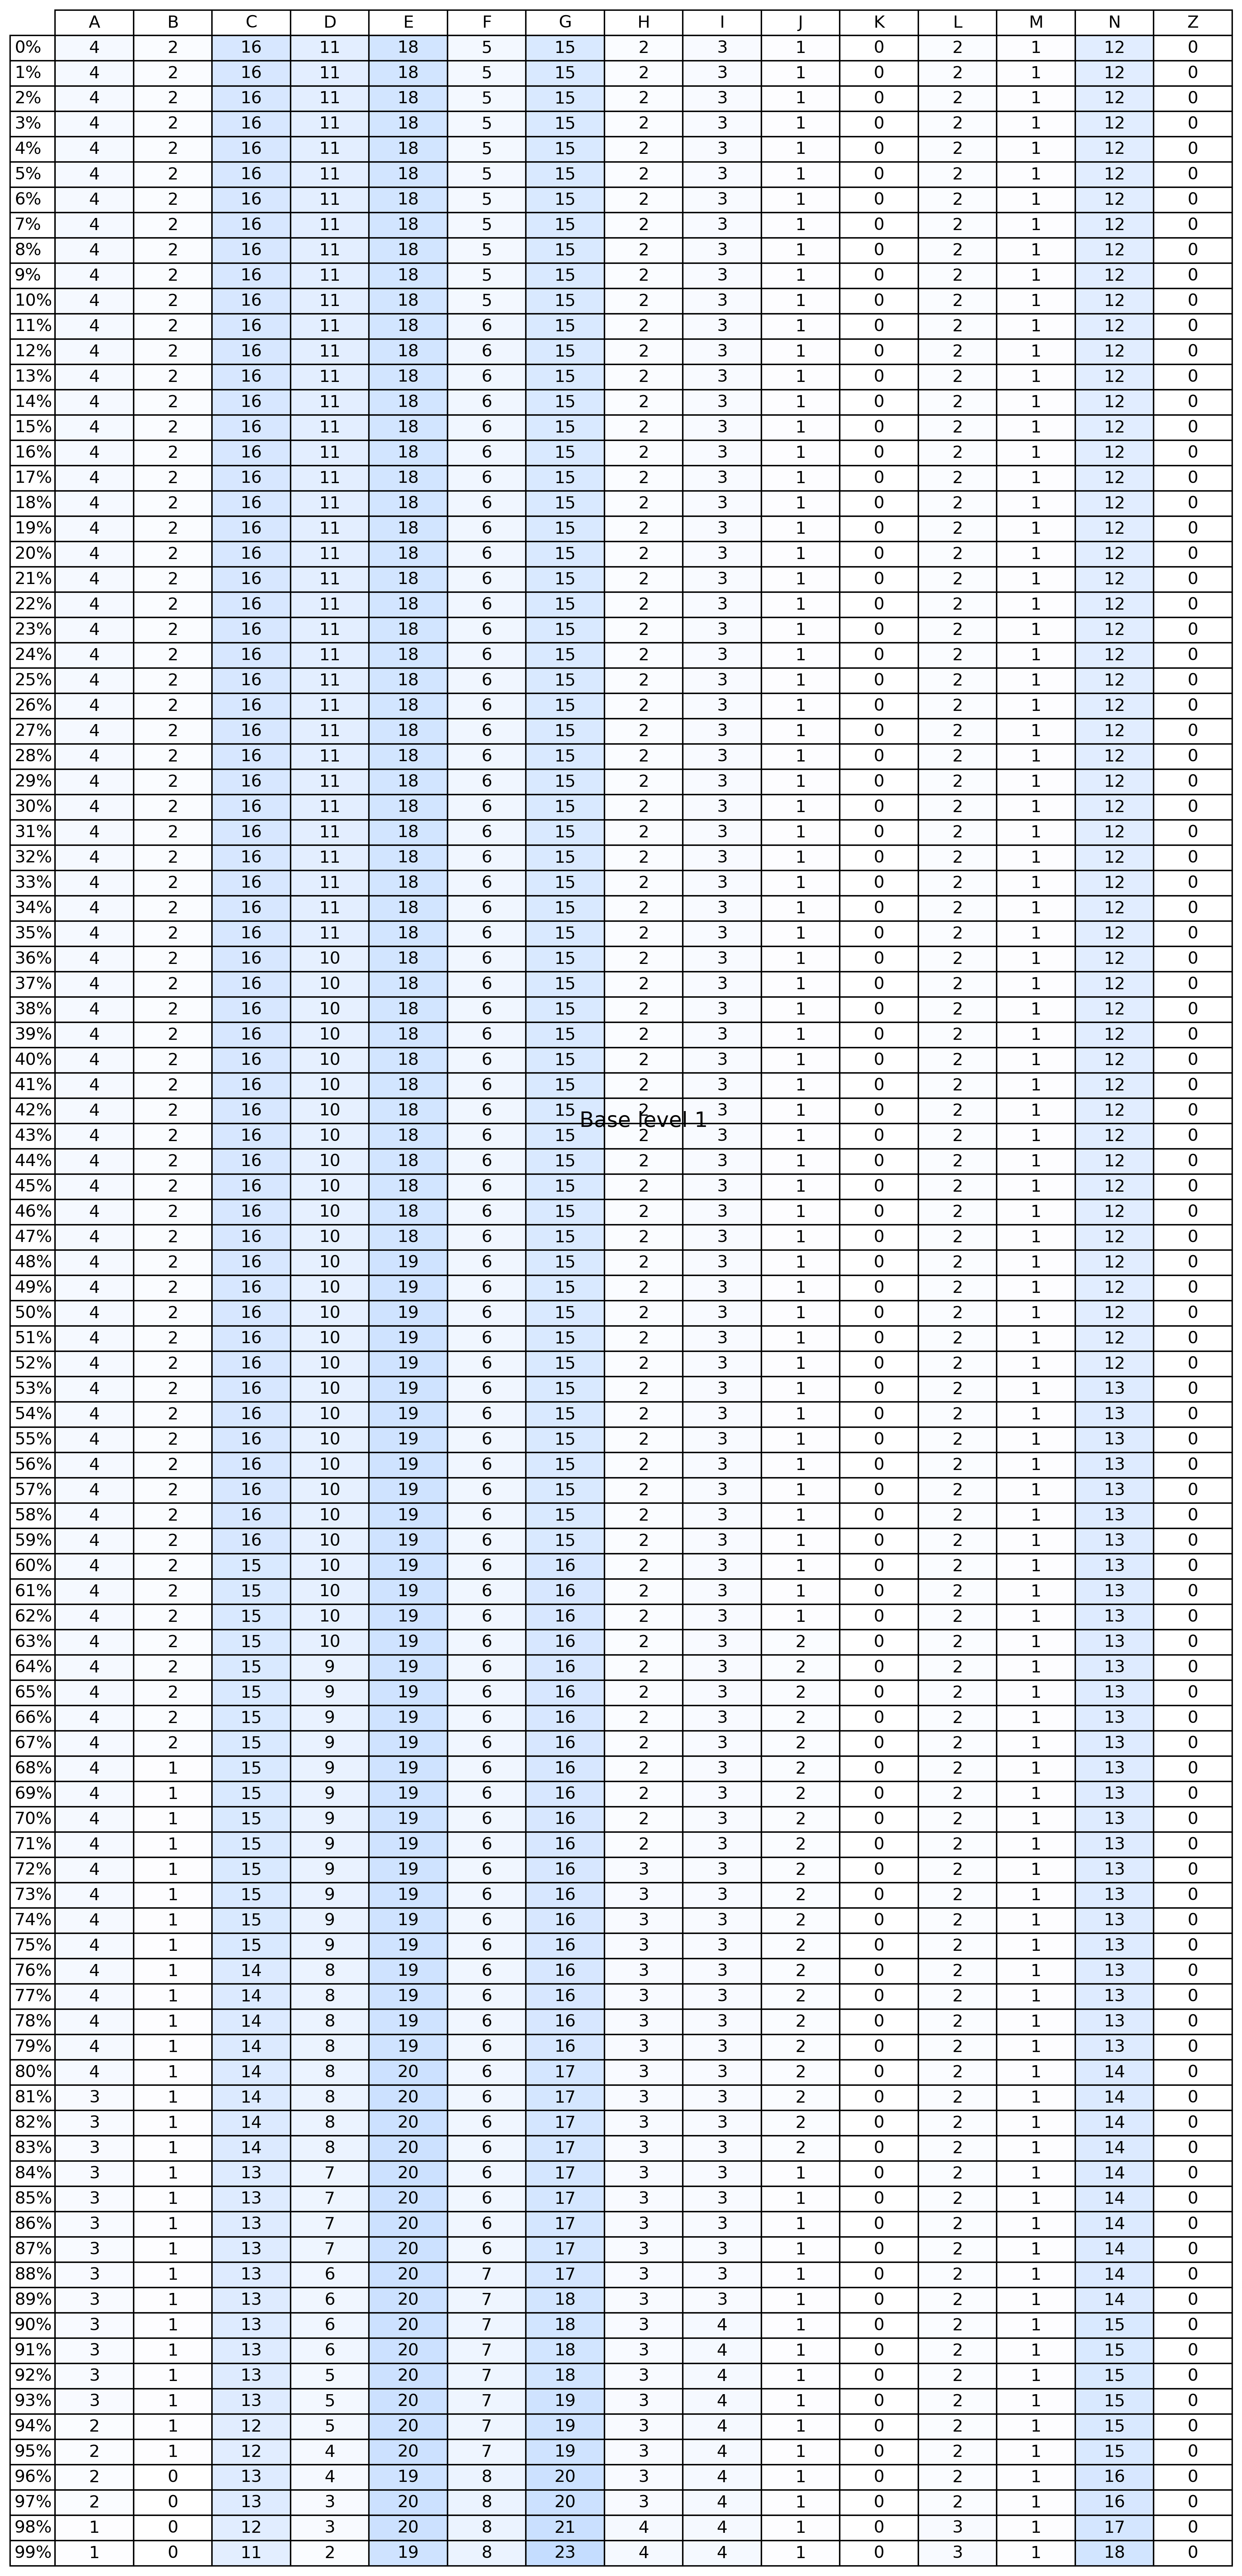

In [19]:
draw_table(1, "Base")

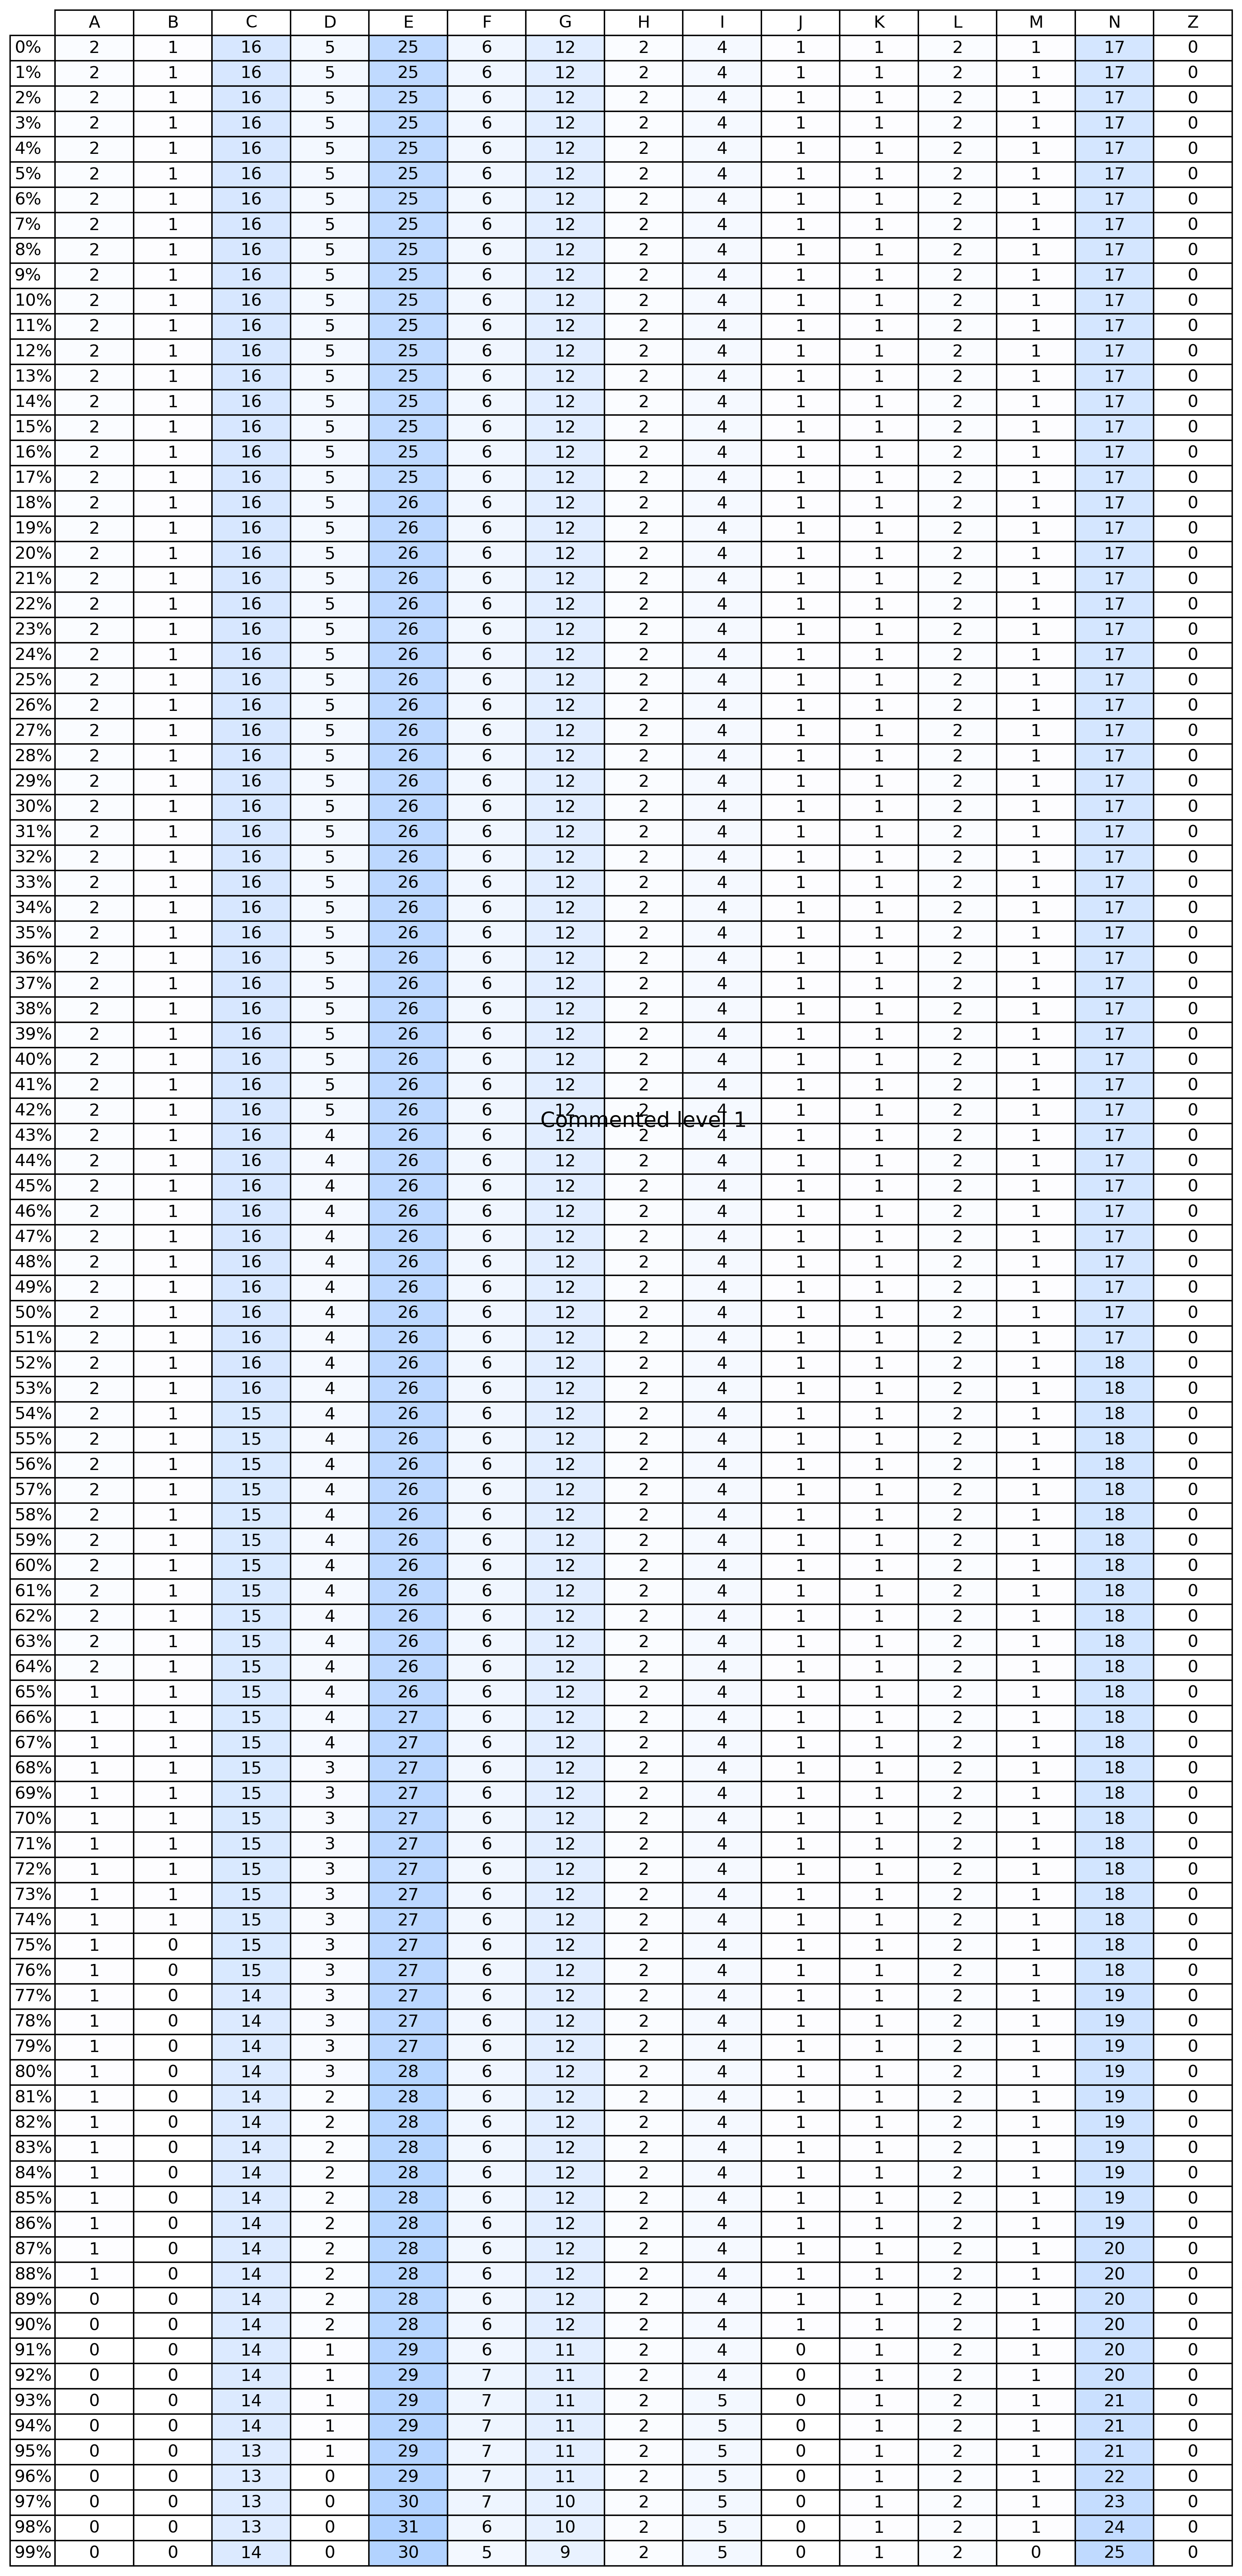

In [20]:
draw_table(1, "Commented")

d3: 使用平行坐标图可视化

与Community 3比较

In [7]:
# 读取已经划分社区的图
G_community = nx.read_gml("../Base_main_community.gml")

In [6]:
G_community.nodes['0']

{'ui': 'D000001', 'name': 'Calcimycin', 'community_louvain': 3}

In [8]:
res = dict()
for c in range(1, 10):
    res[f"community {c}"] = dict()
    # 读取被划分为Community 3的词列表
    community = [G_community.nodes[n]['ui'] for n in G_community.nodes if G_community.nodes[n]["community_louvain"] == c]
    total = len(community)
    for ui in community:
        levels = get_level_from_ui(ui, level=1)
        for level_str in levels:
            if level_str in res[f"community {c}"]:
                res[f"community {c}"][level_str] += 1
            else:
                res[f"community {c}"][level_str] = 1
df_res = pd.DataFrame(res).T
sorted_columns = sorted(df_res.columns)
df_res = df_res[sorted_columns]
df_res

A       B       C       D       E       F       G      H  \
community 1    42.0  1001.0   224.0   613.0   172.0    45.0   379.0   14.0   
community 2    97.0    12.0   188.0    42.0   154.0   240.0   213.0    2.0   
community 3  1058.0  2033.0  1499.0  9301.0   731.0    11.0   486.0   56.0   
community 4    79.0    32.0   653.0   885.0   613.0    17.0   239.0   15.0   
community 5   123.0  1080.0   385.0  1389.0  1139.0    31.0   688.0   96.0   
community 6     NaN    51.0    48.0    83.0     5.0     NaN     NaN    NaN   
community 7   694.0   488.0   661.0  7470.0   640.0    20.0  1600.0   87.0   
community 8    16.0    25.0   286.0   364.0   650.0  1012.0   100.0  276.0   
community 9  1130.0   255.0  8697.0  1888.0  1227.0    49.0    72.0   31.0   

                 I      J      K      L      M       N     Z  
community 1   15.0  196.0    1.0    2.0   16.0    62.0   1.0  
community 2    3.0    5.0    1.0   19.0    3.0    12.0   NaN  
community 3    3.0   56.0    NaN    NaN    1.0    35.0   1.0  
community 4   57.0    5.0    2.0    3.0    7.0    32.0   1.0  
community 5   26.0  291.0    6.0  130.0    7.0   417.0  14.0  
community 6    NaN    NaN    1.0    NaN    NaN     8.0   1.0  
community 7   12.0   17.0    2.0   20.0    7.0    38.0   3.0  
community 8  714.0  166.0  201.0  372.0  308.0  2215.0  15.0  
community 9   11.0   25.0    NaN    4.0    7.0    38.0   NaN

In [9]:
df_res.fillna(0, inplace=True)
df_res.to_csv("../csv_file/Community_levels.csv")

In [10]:
# 计算每行的总和
row_sum = df_res.sum(axis=1)
df_temp = df_res.copy()
# 将除第一列以外的每列的值转化为百分比
for col in df_temp:
    df_temp[col] = df_temp[col] / row_sum * 100
df_temp

A          B          C          D          E          F  \
community 1  1.509163  35.968379   8.048868  22.026590   6.180381   1.616960   
community 2  9.788093   1.210898  18.970737   4.238143  15.539859  24.217962   
community 3  6.928164  13.312815   9.815991  60.906293   4.786851   0.072032   
community 4  2.992424   1.212121  24.734848  33.522727  23.219697   0.643939   
community 5  2.112676  18.550326   6.612848  23.857781  19.563724   0.532463   
community 6  0.000000  25.888325  24.365482  42.131980   2.538071   0.000000   
community 7  5.901862   4.150013   5.621226  63.525810   5.442640   0.170082   
community 8  0.238095   0.372024   4.255952   5.416667   9.672619  15.059524   
community 9  8.411493   1.898169  64.738723  14.053893   9.133542   0.364746   

                     G         H          I         J         K         L  \
community 1  13.618397  0.503054   0.538987  7.042760  0.035932  0.071865   
community 2  21.493441  0.201816   0.302725  0.504541  0.100908  1.917255   
community 3   3.182503  0.366708   0.019645  0.366708  0.000000  0.000000   
community 4   9.053030  0.568182   2.159091  0.189394  0.075758  0.113636   
community 5  11.817245  1.648918   0.446582  4.998282  0.103057  2.232910   
community 6   0.000000  0.000000   0.000000  0.000000  0.507614  0.000000   
community 7  13.606599  0.739859   0.102049  0.144570  0.017008  0.170082   
community 8   1.488095  4.107143  10.625000  2.470238  2.991071  5.535714   
community 9   0.535954  0.230758   0.081882  0.186095  0.000000  0.029775   

                    M          N         Z  
community 1  0.574919   2.227812  0.035932  
community 2  0.302725   1.210898  0.000000  
community 3  0.006548   0.229193  0.006548  
community 4  0.265152   1.212121  0.037879  
community 5  0.120234   7.162487  0.240467  
community 6  0.000000   4.060914  0.507614  
community 7  0.059529   0.323157  0.025512  
community 8  4.583333  32.961310  0.223214  
community 9  0.052107   0.282864  0.000000

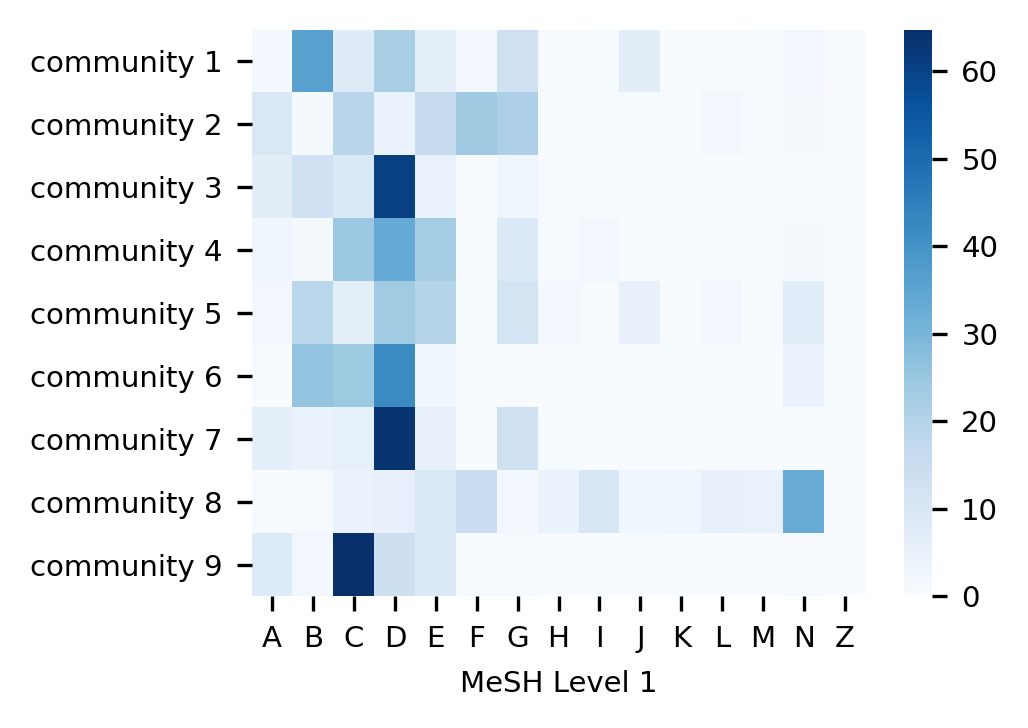

In [14]:
plt.figure(dpi=300)
sns.heatmap(df_temp, cmap="Blues", xticklabels=df_res.columns)
plt.xlabel("MeSH Level 1")
plt.show()

In [22]:
community_6 = [G_community.nodes[n]['ui'] for n in G_community.nodes if G_community.nodes[n]["community_louvain"] == 6]
print(len(community_6))
res = {}
for ui in community_6:
    levels = get_level_from_ui(ui, level=1)
    for level_str in levels:
        if level_str in res:
            res[level_str] += 1
        else:
            res[level_str] = 1
res_list = sorted(res.items(), key=lambda x: x[1], reverse=True)
print("Community 6")
for u, v in res_list:
    print(level1_name[u], ":",v)

119
Community 6
Chemicals and Drugs : 83
Organisms : 51
Diseases : 48
Health Care : 8
Analytical, Diagnostic and Therapeutic Techniques, and Equipment : 5
Geographicals : 1
Humanities : 1


In [23]:
res = {}
for ui in community_6:
    levels = get_level_from_ui(ui, level=2)
    for level_str in levels:
        if level_str in res:
            res[level_str] += 1
        else:
            res[level_str] = 1
res_list = sorted(res.items(), key=lambda x: x[1], reverse=True)
print("Community 6")
for u, v in res_list:
    print(tn_name_dict[u], ":",v)

Community 6
Viruses : 41
Amino Acids, Peptides, and Proteins : 27
Infections : 25
Organic Chemicals : 18
Heterocyclic Compounds : 12
Bacteria : 10
Respiratory Tract Diseases : 8
Pathological Conditions, Signs and Symptoms : 7
Chemical Actions and Uses : 7
Enzymes and Coenzymes : 7
Complex Mixtures : 6
Biological Factors : 3
Health Care Quality, Access, and Evaluation : 3
Environment and Public Health : 3
Animal Diseases : 3
Nervous System Diseases : 3
Investigative Techniques : 2
Therapeutics : 2
Carbohydrates : 2
Health Care Economics and Organizations : 1
Health Services Administration : 1
Surgical Procedures, Operative : 1
Cardiovascular Diseases : 1
Hemic and Lymphatic Diseases : 1
Geographic Locations : 1
Polycyclic Compounds : 1
Humanities : 1
